In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../graph_farms')
sys.path.append('../')
from generate_graphs import generate_graphs
from gnn_framework.data import GraphFarmsDataset
from plotting import plot_graph
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# generate some data for a single wind farm layout and multiple inflows for both load models with one wind speed and ti (testing directions)
generate_graphs(config_path='../graph_farms/config.yml', num_layouts=1, num_inflows=5, dset_path='./connectivity_test', 
                num_threads=2, connectivity='all', loads_model='TwoWT')

wind direction: 297.89° from North


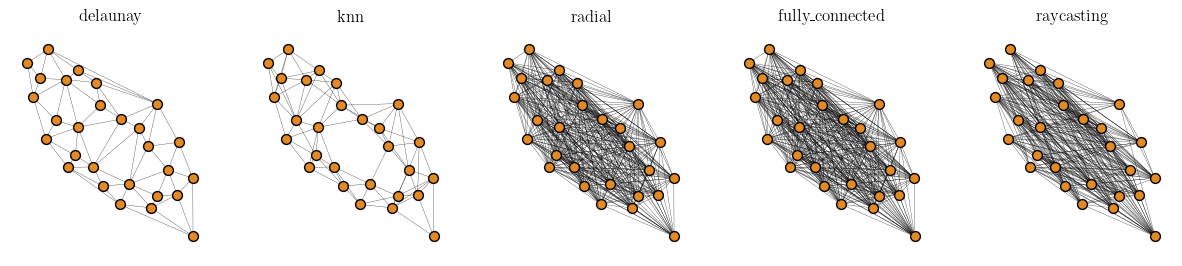

In [42]:
dset_path = r'./connectivity_test/TwoWT/'
options = {'node_color': '#e38a24', "edgecolors": "black", "node_size": 50, "alpha": 1.0, 'linewidths':1, 'width':0.2}

c =['delaunay', 'knn', 'radial', 'fully_connected', 'raycasting']
fig, axs = plt.subplots(ncols=len(c), nrows=1, figsize=(15, 3), dpi=100)

for i, ax in enumerate(axs.flatten()):
    sample = GraphFarmsDataset(dset_path+c[i]).__getitem__(0)
    plot_graph(sample, ax=ax, nx_draw_kwargs=options)
    ax.set_title(c[i])
print('wind direction: {:.2f}° from North'.format(sample.globals[0,1]))
plt.show()

wind direction: 87.63° from North


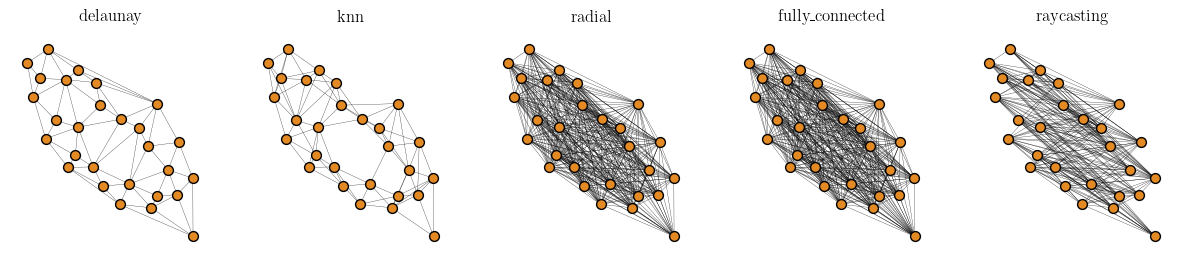

In [41]:

fig, axs = plt.subplots(ncols=len(c), nrows=1, figsize=(15, 3), dpi=100)
for i, ax in enumerate(axs.flatten()):
    sample = GraphFarmsDataset(dset_path+c[i]).__getitem__(3)
    plot_graph(sample, ax=ax, nx_draw_kwargs=options)
    ax.set_title(c[i])
print('wind direction: {:.2f}° from North'.format(sample.globals[0,1]))
plt.show()

notice how raycasting changes connectivity based on wind direction